In [1]:
# NOTE: This does NOT have points close to real ones removed!

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn

crime = pd.read_csv('E:/Vancouver Crime Final/Synthetic Data/commercial_bne_100k_combined.csv')

crime.head(20)

,type,datetime,year,month,day,hour,minute,Hour_Minute,hundred_block,utm_x,...,signal_200,trees_25,trees_100,rain_mm,snow_cm,total_precip_mm,temp_c,humidity,pressure,hours_of_light
0,Break and Enter Commercial,2003-01-01 00:00:00,2003,1,1,0,0,0.000000,64XX VICTORIA DR,495220.95,...,2,5,40,21.6,0.0,21.6,5.8,81.0,101.70,9.53
1,Break and Enter Commercial,2003-01-01 06:06:00,2003,1,1,6,0,6.000000,5XX W GEORGIA ST,491507.39,...,10,2,27,21.6,0.0,21.6,5.5,96.0,101.58,9.53
2,Break and Enter Commercial,2003-01-01 07:07:00,2003,1,1,7,13,7.216667,18XX W 57TH AVE,489132.03,...,0,8,73,21.6,0.0,21.6,5.8,95.0,101.50,9.53
3,Break and Enter Commercial,2003-01-01 07:07:00,2003,1,1,7,13,7.216667,45XX FRASER ST,493431.80,...,2,2,19,21.6,0.0,21.6,5.8,95.0,101.50,9.53
4,Break and Enter Commercial,2003-01-01 11:11:00,2003,1,1,11,0,11.000000,35XX FRASER ST,493447.88,...,1,3,51,21.6,0.0,21.6,6.0,95.0,101.33,9.53
5,Break and Enter Commercial,2003-01-01 12:12:00,2003,1,1,12,0,12.000000,5XX BEATTY ST,492024.04,...,10,0,39,21.6,0.0,21.6,5.7,95.0,101.35,9.53
6,Break and Enter Commercial,2003-01-01 12:12:00,2003,1,1,12,0,12.000000,7XX PACIFIC BLVD,492005.87,...,2,0,0,21.6,0.0,21.6,5.7,95.0,101.35,9.53
7,Break and Enter Commercial,2003-01-01 12:12:00,2003,1,1,12,49,12.816667,28XX BENTALL ST,497676.19,...,3,0,13,21.6,0.0,21.6,5.7,95.0,101.35,9.53
8,Break and Enter Commercial,2003-01-01 19:19:00,2003,1,1,19,35,19.583333,9XX W KING EDWARD AVE,490906.22,...,2,5,48,21.6,0.0,21.6,5.8,95.0,101.20,9.53
9,Break and Enter Commercial,2003-01-01 23:23:00,2003,1,1,23,19,23.316667,10XX E GEORGIA ST,494077.84,...,1,9,37,21.6,0.0,21.6,6.0,95.0,100.89,9.53


In [2]:
# Set Break and ENters to 1 and everything else to 0

crime = crime.replace(['NONE'], 0)

crime = crime.replace(['Break and Enter Residential/Other', 'Break and Enter Commercial'], 1)
crime.head()

,type,datetime,year,month,day,hour,minute,Hour_Minute,hundred_block,utm_x,...,signal_200,trees_25,trees_100,rain_mm,snow_cm,total_precip_mm,temp_c,humidity,pressure,hours_of_light
0,1,2003-01-01 00:00:00,2003,1,1,0,0,0.000000,64XX VICTORIA DR,495220.95,...,2,5,40,21.6,0.0,21.6,5.8,81.0,101.70,9.53
1,1,2003-01-01 06:06:00,2003,1,1,6,0,6.000000,5XX W GEORGIA ST,491507.39,...,10,2,27,21.6,0.0,21.6,5.5,96.0,101.58,9.53
2,1,2003-01-01 07:07:00,2003,1,1,7,13,7.216667,18XX W 57TH AVE,489132.03,...,0,8,73,21.6,0.0,21.6,5.8,95.0,101.50,9.53
3,1,2003-01-01 07:07:00,2003,1,1,7,13,7.216667,45XX FRASER ST,493431.80,...,2,2,19,21.6,0.0,21.6,5.8,95.0,101.50,9.53
4,1,2003-01-01 11:11:00,2003,1,1,11,0,11.000000,35XX FRASER ST,493447.88,...,1,3,51,21.6,0.0,21.6,6.0,95.0,101.33,9.53


In [3]:
crime

,type,datetime,year,month,day,hour,minute,Hour_Minute,hundred_block,utm_x,...,signal_200,trees_25,trees_100,rain_mm,snow_cm,total_precip_mm,temp_c,humidity,pressure,hours_of_light
0,1,2003-01-01 00:00:00,2003,1,1,0,0,0.000000,64XX VICTORIA DR,495220.950000,...,2,5,40,21.6,0.0,21.6,5.8,81.0,101.70,9.53
1,1,2003-01-01 06:06:00,2003,1,1,6,0,6.000000,5XX W GEORGIA ST,491507.390000,...,10,2,27,21.6,0.0,21.6,5.5,96.0,101.58,9.53
2,1,2003-01-01 07:07:00,2003,1,1,7,13,7.216667,18XX W 57TH AVE,489132.030000,...,0,8,73,21.6,0.0,21.6,5.8,95.0,101.50,9.53
3,1,2003-01-01 07:07:00,2003,1,1,7,13,7.216667,45XX FRASER ST,493431.800000,...,2,2,19,21.6,0.0,21.6,5.8,95.0,101.50,9.53
4,1,2003-01-01 11:11:00,2003,1,1,11,0,11.000000,35XX FRASER ST,493447.880000,...,1,3,51,21.6,0.0,21.6,6.0,95.0,101.33,9.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138374,0,2018-02-07 12:46:00,2018,2,7,12,46,12.766667,9XX E 27TH AVE,493764.962443,...,0,11,64,2.0,0.0,2.0,8.7,95.0,102.79,10.87
138375,0,2004-12-31 00:20:00,2004,12,31,0,20,0.333333,ODLUM DR / WILLIAM ST,494477.870000,...,1,7,46,2.0,0.0,2.0,3.5,92.0,100.42,9.52
138376,0,2008-08-27 01:35:00,2008,8,27,1,35,1.583333,9XX E 62ND AV,493674.480000,...,0,7,74,4.2,0.0,4.2,11.3,92.0,101.00,14.82
138377,0,2018-02-14 22:55:00,2018,2,14,22,55,22.916667,E 29TH AVE / QUEBEC ST,492535.810000,...,3,10,67,6.2,0.0,6.2,1.9,93.0,102.27,11.24


In [4]:
### Begin Processing the Data


# Import Pre-processing module
from sklearn import preprocessing

# Create Label Encoder
le = preprocessing.LabelEncoder()

# Convert the string columns to numeric
# .astype(str) to ensude they are read as strings and not as mixed types
crime['datetime'] = le.fit_transform(crime['datetime'].astype(str))
crime['hundred_block'] = le.fit_transform(crime['hundred_block'].astype(str))


# Display the results
crime

,type,datetime,year,month,day,hour,minute,Hour_Minute,hundred_block,utm_x,...,signal_200,trees_25,trees_100,rain_mm,snow_cm,total_precip_mm,temp_c,humidity,pressure,hours_of_light
0,1,0,2003,1,1,0,0,0.000000,11763,495220.950000,...,2,5,40,21.6,0.0,21.6,5.8,81.0,101.70,9.53
1,1,5,2003,1,1,6,0,6.000000,11326,491507.390000,...,10,2,27,21.6,0.0,21.6,5.5,96.0,101.58,9.53
2,1,6,2003,1,1,7,13,7.216667,2478,489132.030000,...,0,8,73,21.6,0.0,21.6,5.8,95.0,101.50,9.53
3,1,6,2003,1,1,7,13,7.216667,9101,493431.800000,...,2,2,19,21.6,0.0,21.6,5.8,95.0,101.50,9.53
4,1,8,2003,1,1,11,0,11.000000,7337,493447.880000,...,1,3,51,21.6,0.0,21.6,6.0,95.0,101.33,9.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138374,0,118689,2018,2,7,12,46,12.766667,14589,493764.962443,...,0,11,64,2.0,0.0,2.0,8.7,95.0,102.79,10.87
138375,0,16783,2004,12,31,0,20,0.333333,19583,494477.870000,...,1,7,46,2.0,0.0,2.0,3.5,92.0,100.42,9.52
138376,0,46108,2008,8,27,1,35,1.583333,14615,493674.480000,...,0,7,74,4.2,0.0,4.2,11.3,92.0,101.00,14.82
138377,0,118863,2018,2,14,22,55,22.916667,16875,492535.810000,...,3,10,67,6.2,0.0,6.2,1.9,93.0,102.27,11.24


In [5]:
# Scale the Data

columns = [col for col in crime if col not in ['type']]


# Properly scale the reduced set of features
features = crime[columns]

from sklearn.preprocessing import MinMaxScaler
scaler = preprocessing.MinMaxScaler()

print(scaler.fit(features))

MinMaxScaler(copy=True, feature_range=(0, 1))


In [6]:
# Properly scale the features

columns = [col for col in crime if col not in ['type']]

# Properly scale the reduced set of features
features = crime[columns]


scaler = MinMaxScaler().fit(features.values) # scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values) # features = scaler.transform(features.values)
crime[columns] = features
crime

,type,datetime,year,month,day,hour,minute,Hour_Minute,hundred_block,utm_x,...,signal_200,trees_25,trees_100,rain_mm,snow_cm,total_precip_mm,temp_c,humidity,pressure,hours_of_light
0,1,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.539637,0.788730,...,0.142857,0.20,0.305344,0.235808,0.0,0.235808,0.408421,0.776471,0.609459,0.010909
1,1,0.000038,0.0000,0.000000,0.000000,0.260870,0.000000,0.250174,0.519589,0.534303,...,0.714286,0.08,0.206107,0.235808,0.0,0.235808,0.402105,0.952941,0.593243,0.010909
2,1,0.000046,0.0000,0.000000,0.000000,0.304348,0.220339,0.300903,0.113680,0.371560,...,0.000000,0.32,0.557252,0.235808,0.0,0.235808,0.408421,0.941176,0.582432,0.010909
3,1,0.000046,0.0000,0.000000,0.000000,0.304348,0.220339,0.300903,0.417515,0.666150,...,0.142857,0.08,0.145038,0.235808,0.0,0.235808,0.408421,0.941176,0.582432,0.010909
4,1,0.000061,0.0000,0.000000,0.000000,0.478261,0.000000,0.458652,0.336591,0.667252,...,0.071429,0.12,0.389313,0.235808,0.0,0.235808,0.412632,0.941176,0.559459,0.010909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138374,0,0.907589,0.9375,0.090909,0.200000,0.521739,0.779661,0.532314,0.669282,0.688976,...,0.000000,0.44,0.488550,0.021834,0.0,0.021834,0.469474,0.941176,0.756757,0.173333
138375,0,0.128336,0.0625,1.000000,1.000000,0.000000,0.338983,0.013899,0.898385,0.737819,...,0.071429,0.28,0.351145,0.021834,0.0,0.021834,0.360000,0.905882,0.436486,0.009697
138376,0,0.352578,0.3125,0.636364,0.866667,0.043478,0.593220,0.066018,0.670474,0.682777,...,0.000000,0.28,0.564885,0.045852,0.0,0.045852,0.524211,0.905882,0.514865,0.652121
138377,0,0.908919,0.9375,0.090909,0.433333,0.956522,0.932203,0.955525,0.774154,0.604763,...,0.214286,0.40,0.511450,0.067686,0.0,0.067686,0.326316,0.917647,0.686486,0.218182


In [8]:
# split training data into training and testing
from sklearn.model_selection import train_test_split

# Select columns to that are data
cols = [col for col in crime if col not in ['type', 'minute', 'Hour_Minute', 'latitude', 'longitude', 'datetime' 
                                            ]]

X = crime[cols]

# Select target data
y = crime['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.3)
print(X_train.shape)

(96865, 24)


In [9]:
X_train

,year,month,day,hour,hundred_block,utm_x,utm_y,light_pole_12_5,light_pole_25,light_pole_50,...,signal_200,trees_25,trees_100,rain_mm,snow_cm,total_precip_mm,temp_c,humidity,pressure,hours_of_light
72095,0.3750,0.000000,0.866667,0.608696,0.444215,0.643550,0.712832,0.000000,0.029851,0.192308,...,0.500000,0.16,0.465649,0.039301,0.0,0.039301,0.305263,0.929412,0.647297,0.110303
64323,0.1875,0.545455,0.366667,0.086957,0.159923,0.351495,0.597300,0.035714,0.059701,0.141026,...,0.142857,0.40,0.526718,0.111354,0.0,0.111354,0.608421,0.764706,0.533784,0.952727
130897,0.1250,0.181818,0.866667,0.608696,0.068126,0.422120,0.499471,0.000000,0.089552,0.205128,...,0.214286,0.20,0.458015,0.098253,0.0,0.098253,0.494737,0.882353,0.362162,0.515152
135079,0.3125,0.818182,0.666667,0.478261,0.563217,0.581250,0.300513,0.000000,0.014925,0.064103,...,0.071429,0.28,0.435115,0.000000,0.0,0.000000,0.511579,0.670588,0.859459,0.252121
99821,0.1250,0.363636,0.066667,0.478261,0.557803,0.716358,0.180692,0.000000,0.014925,0.064103,...,0.071429,0.36,0.625954,0.000000,0.0,0.000000,0.587368,0.752941,0.624324,0.791515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82270,1.0000,0.545455,0.833333,0.869565,0.875172,0.606900,0.119379,0.178571,0.134328,0.205128,...,0.071429,0.24,0.511450,0.000000,0.0,0.000000,0.757895,0.529412,0.581081,0.880000
65615,0.5000,0.272727,0.366667,0.695652,0.036563,0.724389,0.644755,0.035714,0.014925,0.051282,...,0.071429,0.00,0.091603,0.000000,0.0,0.000000,0.477895,0.588235,0.606757,0.632727
77655,0.8125,0.000000,0.966667,0.695652,0.905634,0.442263,0.742548,0.000000,0.044776,0.076923,...,0.071429,0.56,0.633588,0.019651,0.0,0.019651,0.416842,0.811765,0.537838,0.122424
56088,0.4375,1.000000,0.966667,0.652174,0.026791,0.518395,0.773960,0.107143,0.089552,0.192308,...,0.500000,0.16,0.442748,0.000000,0.0,0.000000,0.317895,0.400000,0.650000,0.007273


In [10]:
# Trying Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

model_tree = RandomForestClassifier(random_state=100, n_estimators=50)
model_tree.fit(X_train, y_train)
print(model_tree.feature_importances_)
sel_model_tree = SelectFromModel(estimator=model_tree, prefit=True, threshold='mean')  
      # since we already fit the data, we specify prefit option here
      # Features whose importance is greater or equal to the threshold are kept while the others are discarded.
X_train_sfm_tree = sel_model_tree.transform(X_train)
print(sel_model_tree.get_support())

feature_importances = pd.DataFrame(model_tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', 
                                                                        ascending=False)
feature_importances

[0.02918055 0.01826787 0.02723806 0.04011079 0.16671168 0.07312228
 0.10070557 0.02182437 0.03671088 0.05161094 0.07764325 0.00528986
 0.00829462 0.03778172 0.06505291 0.03029474 0.05039893 0.01574317
 0.00147894 0.0161142  0.03230105 0.02920247 0.03281462 0.03210653]
[False False False False  True  True  True False False  True  True False
 False False  True False  True False False False False False False False]


,importance
hundred_block,0.166712
utm_y,0.100706
light_pole_100,0.077643
utm_x,0.073122
signal_200,0.065053
light_pole_50,0.051611
trees_100,0.050399
hour,0.040111
signal_100,0.037782
light_pole_25,0.036711


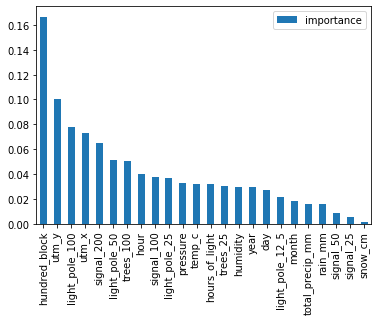

In [11]:
feature_importances.plot.bar()

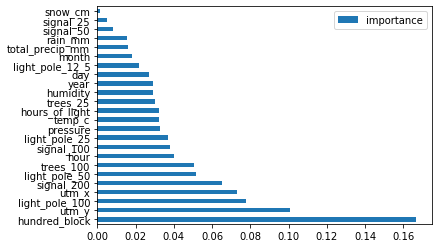

In [12]:
feature_importances.plot.barh()

In [14]:
# Simple Neural Network

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# import needed modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [15]:
# Try using the MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(24, 24, 24), activation='relu', solver='adam', max_iter=300)
mlp.fit(X_train, y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_train, predict_train))
print(classification_report(y_train, predict_train))

[[59391 10513]
 [ 4712 22249]]
              precision    recall  f1-score   support

           0       0.93      0.85      0.89     69904
           1       0.68      0.83      0.75     26961

    accuracy                           0.84     96865
   macro avg       0.80      0.84      0.82     96865
weighted avg       0.86      0.84      0.85     96865



In [17]:
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))

[[25390  4728]
 [ 2226  9170]]
              precision    recall  f1-score   support

           0       0.92      0.84      0.88     30118
           1       0.66      0.80      0.73     11396

    accuracy                           0.83     41514
   macro avg       0.79      0.82      0.80     41514
weighted avg       0.85      0.83      0.84     41514



In [ ]:
# Try using the MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(29, 29, 29), activation='relu', solver='adam', max_iter=3000)
mlp.fit(X_train, y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [ ]:
print(confusion_matrix(y_train, predict_train))
print(classification_report(y_train, predict_train))

In [ ]:
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))

In [ ]:
############################# END HERE ###################################

In [ ]:
# Try using the MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(29, 29, 29, 29, 29, 29, 29), activation='relu', solver='adam', max_iter=200)
mlp.fit(X_train, y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [ ]:
print(confusion_matrix(y_train, predict_train))
print(classification_report(y_train, predict_train))

In [ ]:
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))

In [ ]:
feature_importances

In [ ]:
# Cut down features

# split training data into training and testing
from sklearn.model_selection import train_test_split

# Select columns to that are data
cols = [col for col in crime if col not in ['type', 'minute', 'hour', 'latitude', 'longitude', 'datetime']]

X = crime[cols]

# Select target data
y = crime['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.3)
print(X_train.shape)

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
# Trying Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

model_tree = RandomForestClassifier(random_state=100, n_estimators=50)
model_tree.fit(X_train, y_train)
print(model_tree.feature_importances_)
sel_model_tree = SelectFromModel(estimator=model_tree, prefit=True, threshold='mean')  
      # since we already fit the data, we specify prefit option here
      # Features whose importance is greater or equal to the threshold are kept while the others are discarded.
X_train_sfm_tree = sel_model_tree.transform(X_train)
print(sel_model_tree.get_support())

feature_importances = pd.DataFrame(model_tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', 
                                                                        ascending=False)
feature_importances

In [ ]:
# Try using the MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(24, 24, 24), activation='relu', solver='adam', max_iter=300)
mlp.fit(X_train, y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [ ]:
print(confusion_matrix(y_train, predict_train))
print(classification_report(y_train, predict_train))

In [ ]:
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))

In [ ]:
# Try using the MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(29, 29, 29, 29, 29, 29, 29), activation='relu', solver='adam', max_iter=300)
mlp.fit(X_train, y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [ ]:
print(confusion_matrix(y_train, predict_train))
print(classification_report(y_train, predict_train))

In [ ]:
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))

In [ ]:
# Cut down features again

# split training data into training and testing
from sklearn.model_selection import train_test_split

# Select columns to that are data
cols = [col for col in crime if col not in ['type', 'minute', 'hour', 'latitude', 'longitude', 'datetime', 
                                            'snow_cm', 'rain_mm', 'signal_25', 'signal_50', 'signal_100', 
                                            'light_pole_12_5']]

X = crime[cols]

# Select target data
y = crime['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.3)
print(X_train.shape)

In [ ]:
# Trying Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

model_tree = RandomForestClassifier(random_state=100, n_estimators=50)
model_tree.fit(X_train, y_train)
print(model_tree.feature_importances_)
sel_model_tree = SelectFromModel(estimator=model_tree, prefit=True, threshold='mean')  
      # since we already fit the data, we specify prefit option here
      # Features whose importance is greater or equal to the threshold are kept while the others are discarded.
X_train_sfm_tree = sel_model_tree.transform(X_train)
print(sel_model_tree.get_support())

feature_importances = pd.DataFrame(model_tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', 
                                                                        ascending=False)
feature_importances

In [ ]:
# Try using the MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(18, 18, 18), activation='relu', solver='adam', max_iter=300)
mlp.fit(X_train, y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [ ]:
print(confusion_matrix(y_train, predict_train))
print(classification_report(y_train, predict_train))

In [ ]:
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))

In [ ]:
# Try using the MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(18, 18, 18, 18, 18, 18, 18), activation='relu', solver='adam', max_iter=300)
mlp.fit(X_train, y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [ ]:
print(confusion_matrix(y_train, predict_train))
print(classification_report(y_train, predict_train))

In [ ]:
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))